In [2]:
from hyperparams import *
from CNNModels import *
from data_processing_func import *
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import random

## Get basic information regarding data set

In [2]:
X_train, X_val, X_test, Y_train, Y_val, Y_test = getTrainingDataFromPath()
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(739800, 16, 16, 4) (247050, 16, 16, 4) (491400, 16, 16, 4) (739800, 3) (247050, 3) (491400, 3)


In [3]:
## Get distribution of samples
training_distribution = np.sum(Y_train,axis=0)/len(Y_train)
validation_distribution = np.sum(Y_val,axis=0)/len(Y_val)
test_distribution = np.sum(Y_test,axis=0)/len(Y_test)

print(training_distribution)
print(validation_distribution)
print(test_distribution)

[0.37575966 0.27968911 0.34455123]
[0.39143088 0.22811577 0.38045335]
[0.36472324 0.3220289  0.31324786]


## AlexNet VS GoogLeNet
### Training AlexNet

In [20]:
AN_pred, AN_training_loss, AN_val_loss = train_predict(X=X_train, Y=Y_train, batch_size=128, valX=X_val, valY=Y_val,
                                                       model_ckpt_path='model/ckpt1.meta', isBayesian=True,
                                                       epochs=50, model=Condensed_AlexNet, dropout=0.15)

Training time:  39.85 Epoch: 001/050 ======== Loss: 1.0529 Accuracy: 0.4481 val_Loss: 1.0398 val_acc: 0.4661 
Training time:  38.71 Epoch: 002/050 ======== Loss: 1.0505 Accuracy: 0.4548 val_Loss: 1.0332 val_acc: 0.4804 
Training time:  39.03 Epoch: 003/050 ======== Loss: 1.0475 Accuracy: 0.4564 val_Loss: 1.0346 val_acc: 0.4737 
Training time:  39.04 Epoch: 004/050 ======== Loss: 1.0459 Accuracy: 0.4578 val_Loss: 1.0355 val_acc: 0.4753 
Training time:  38.66 Epoch: 005/050 ======== Loss: 1.0442 Accuracy: 0.4598 val_Loss: 1.0375 val_acc: 0.4723 
Training time:  39.5 Epoch: 006/050 ======== Loss: 1.0450 Accuracy: 0.4614 val_Loss: 1.0316 val_acc: 0.4802 
Training time:  38.75 Epoch: 007/050 ======== Loss: 1.0457 Accuracy: 0.4515 val_Loss: 1.0443 val_acc: 0.4524 
Training time:  39.36 Epoch: 008/050 ======== Loss: 1.0412 Accuracy: 0.4627 val_Loss: 1.0362 val_acc: 0.4712 
Training time:  39.07 Epoch: 009/050 ======== Loss: 1.0415 Accuracy: 0.4630 val_Loss: 1.0364 val_acc: 0.4723 
Training ti

### Training GoogLeNet

In [32]:
GN_pred, GN_training_loss, GN_val_loss = train_predict(X=X_train, Y=Y_train, batch_size=128, valX=X_val, valY=Y_val, 
                                                       model_ckpt_path='model/ckpt2.meta', epochs=50, model=Condensed_GoogleNet)

Training time:  108.81 Epoch: 001/050 ======== Loss: 1.0526 Accuracy: 0.4530 val_Loss: 1.0332 val_acc: 0.4831 
Training time:  106.89 Epoch: 002/050 ======== Loss: 1.0480 Accuracy: 0.4564 val_Loss: 1.0345 val_acc: 0.4746 
Training time:  106.23 Epoch: 003/050 ======== Loss: 1.0504 Accuracy: 0.4513 val_Loss: 1.0430 val_acc: 0.4631 
Training time:  106.1 Epoch: 004/050 ======== Loss: 1.0466 Accuracy: 0.4576 val_Loss: 1.0344 val_acc: 0.4740 
Training time:  106.15 Epoch: 005/050 ======== Loss: 1.0461 Accuracy: 0.4559 val_Loss: 1.0358 val_acc: 0.4680 
Training time:  106.06 Epoch: 006/050 ======== Loss: 1.0449 Accuracy: 0.4590 val_Loss: 1.0333 val_acc: 0.4738 
Training time:  106.21 Epoch: 007/050 ======== Loss: 1.0446 Accuracy: 0.4613 val_Loss: 1.0261 val_acc: 0.4849 
Training time:  105.85 Epoch: 008/050 ======== Loss: 1.0454 Accuracy: 0.4603 val_Loss: 1.0310 val_acc: 0.4790 
Training time:  106.33 Epoch: 009/050 ======== Loss: 1.0448 Accuracy: 0.4576 val_Loss: 1.0388 val_acc: 0.4664 
Tr

### Comparison of GoogLeNet and AlexNet

(1.02, 1.06)

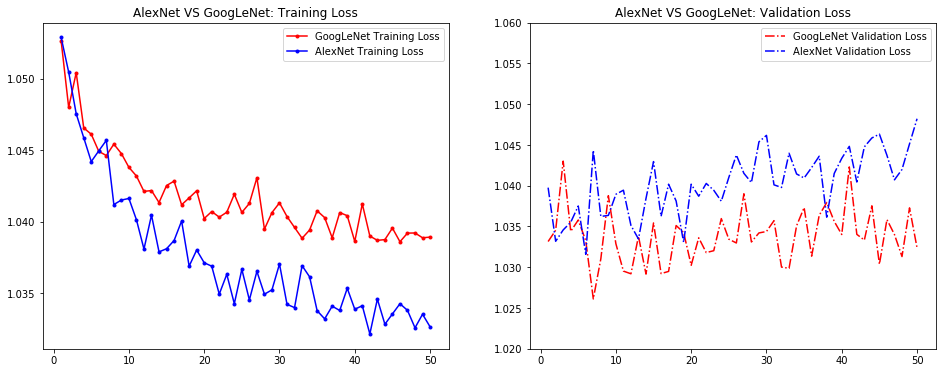

In [34]:
import matplotlib.pyplot as plt

epochs=50
plt.figure(figsize=(16, 6))
plt.subplot(121)
plt.plot(range(1, epochs+1), GN_training_loss, 'r.-')
plt.plot(range(1, epochs+1), AN_training_loss, 'b.-')
plt.legend(['GoogLeNet Training Loss', 'AlexNet Training Loss'])
plt.title('AlexNet VS GoogLeNet: Training Loss')

plt.subplot(122)
plt.plot(range(1, epochs+1), GN_val_loss, 'r-.')
plt.plot(range(1, epochs+1), AN_val_loss, 'b-.')
plt.legend(['GoogLeNet Validation Loss', 'AlexNet Validation Loss'])
plt.title('AlexNet VS GoogLeNet: Validation Loss')
plt.ylim((1.02, 1.06))

## Bayesian Neural Networks
A simulation anaysis illustrating how to acquire prediction from bayesian neural network, and a simple illustration of the resemblence of prediction distribution from:

    a) 10 ensembled AlexNet
    
    b) AlexNet sampled from last 10 epochs of one training
    
Comparison done by computing mean and variance of training losses. A 95 percent confidence interval is also acquired.

### Ensemble 10 AlexNet

In [30]:
from IPython.display import clear_output
ensemble_tl, ensemble_val = [], []
for i in range(10):
    AN_pred, AN_training_loss, AN_val_loss = train_predict(X=X_train, Y=Y_train, batch_size=128, valX=X_val, valY=Y_val, 
                                                           isBayesian=False, model_ckpt_path='model/ckpt3.meta', 
                                                           epochs=50, model=Condensed_AlexNet, dropout=0.15)
    ensemble_tl.append(AN_training_loss[-1])
    clear_output()
    
# Compute 95% CI for training losses
mean_tl, std_tl = np.mean(ensemble_tl), np.std(ensemble_tl)

tl_CI_l = mean_tl - 1.65*std_tl/np.sqrt(10)
tl_CI_u = mean_tl + 1.65*std_tl/np.sqrt(10)

print('95 percent CI for ensemble training loss:', tl_CI_l, '<=', mean_tl, '<=', tl_CI_u)

95 percent CI for ensemble training loss: 1.0352580719294642 <= 1.036915627868474 <= 1.0385731838074836


### Bayesian AlexNet
Assume staionarity is reached at the final 10 epochs (we thus only sample from last 10 epochs)

In [31]:
# Compute 95% CI for training losses
bayes_mean_tl, bayes_std_tl = np.mean(AN_training_loss[-10:]), np.std(AN_training_loss[-10:])

bayes_tl_CI_l = bayes_mean_tl - 1.65*bayes_std_tl/np.sqrt(10)
bayes_tl_CI_u = bayes_mean_tl + 1.65*bayes_std_tl/np.sqrt(10)

print('95 percent CI for bayesian alexnet training loss:', bayes_tl_CI_l, '<=', bayes_mean_tl, '<=', bayes_tl_CI_u)

95 percent CI for bayesian alexnet training loss: 1.0330139461142003 <= 1.0334178669169067 <= 1.0338217877196132


## Implemenet Cost Sensitive Loss Function
Let us implement cost sensitive with penalty larger at (1,3)-th entry and (3,1)-th entry, i.e. penalize more for misclassifying a stock we should long to a one we should short, or vice versa. This makes sense if we are dong a long/short strategy. Finally, we see that, given a predicted signal is 'long', we have much more greatly optimized the odds of a signal is actually long to that it is actually short! This inspires a long only deep portfolio strategy.

In [47]:
cost_matrix = np.array([[0, 1.2, 1.3], [1.1, 0, 1.1], [1.3, 1.2, 0]])
GN_pred_c, GN_training_loss_c, GN_val_loss_c = train_predict(X=X_train, Y=Y_train,valX=X_val, 
                                                             valY=Y_val, batch_size=128,
                                                             cost_sensitive_loss=True, cost_matrix=cost_matrix, 
                                                             model_ckpt_path='model/ckpt5.meta', 
                                                             epochs=50, model=Condensed_GoogleNet)


Training time:  108.71 Epoch: 001/050 ======== Loss: 1.0524 Accuracy: 0.4458 val_Loss: 1.0413 val_acc: 0.4574 
Training time:  106.67 Epoch: 002/050 ======== Loss: 1.0492 Accuracy: 0.4543 val_Loss: 1.0350 val_acc: 0.4717 
Training time:  106.65 Epoch: 003/050 ======== Loss: 1.0475 Accuracy: 0.4575 val_Loss: 1.0294 val_acc: 0.4781 
Training time:  107.04 Epoch: 004/050 ======== Loss: 1.0469 Accuracy: 0.4564 val_Loss: 1.0346 val_acc: 0.4703 
Training time:  107.14 Epoch: 005/050 ======== Loss: 1.0460 Accuracy: 0.4593 val_Loss: 1.0315 val_acc: 0.4784 
Training time:  106.88 Epoch: 006/050 ======== Loss: 1.0479 Accuracy: 0.4482 val_Loss: 1.0397 val_acc: 0.4545 
Training time:  106.64 Epoch: 007/050 ======== Loss: 1.0468 Accuracy: 0.4593 val_Loss: 1.0329 val_acc: 0.4808 
Training time:  106.97 Epoch: 008/050 ======== Loss: 1.0463 Accuracy: 0.4597 val_Loss: 1.0287 val_acc: 0.4812 
Training time:  106.71 Epoch: 009/050 ======== Loss: 1.0441 Accuracy: 0.4607 val_Loss: 1.0312 val_acc: 0.4739 
T

In [71]:
cm1 = get_confusion_matrix(Y_val, GN_pred)
cm2 = get_confusion_matrix(Y_val, GN_pred_c)

odds_without_cost = cm1[0,0]/cm1[0,2]
odds_with_cost = cm2[0,0]/cm2[0,2]

print('No cost sensitive loss:', odds_without_cost)
print('with cost sensitive loss:', odds_with_cost)

No cost sensitive loss: 1.942273000601323
with cost sensitive loss: 2.121920637262133


## Implement cost-sensitive Bayesian GoogLeNet to predict return movements on test set

In [52]:
X_train = np.concatenate([X_train, X_val])
Y_train = np.concatenate([Y_train, Y_val])

pred, training_loss, validation_loss = train_predict(X=X_train, Y=Y_train, batch_size=128, valX=X_test, valY=Y_test, 
                                                     cost_matrix=cost_matrix, model_ckpt_path='model/ckpt6.meta',
                                                     isBayesian=True, epochs=50, model=Condensed_GoogleNet)

with open('data/predictions', 'wb') as p:
    pickle.dump(pred, p)
    pickle.close()

Training time:  150.24 Epoch: 001/050 ======== Loss: 1.0465 Accuracy: 0.4582 val_Loss: 1.0613 val_acc: 0.4433 
Training time:  148.99 Epoch: 002/050 ======== Loss: 1.0454 Accuracy: 0.4588 val_Loss: 1.0564 val_acc: 0.4458 
Training time:  149.57 Epoch: 003/050 ======== Loss: 1.0428 Accuracy: 0.4666 val_Loss: 1.0698 val_acc: 0.4404 
Training time:  149.48 Epoch: 004/050 ======== Loss: 1.0435 Accuracy: 0.4606 val_Loss: 1.0572 val_acc: 0.4440 
Training time:  149.46 Epoch: 005/050 ======== Loss: 1.0395 Accuracy: 0.4682 val_Loss: 1.0626 val_acc: 0.4433 
Training time:  149.59 Epoch: 006/050 ======== Loss: 1.0390 Accuracy: 0.4679 val_Loss: 1.0650 val_acc: 0.4439 
Training time:  149.4 Epoch: 007/050 ======== Loss: 1.0387 Accuracy: 0.4691 val_Loss: 1.0624 val_acc: 0.4435 
Training time:  149.67 Epoch: 008/050 ======== Loss: 1.0397 Accuracy: 0.4628 val_Loss: 1.0555 val_acc: 0.4465 
Training time:  149.61 Epoch: 009/050 ======== Loss: 1.0384 Accuracy: 0.4679 val_Loss: 1.0585 val_acc: 0.4449 
Tr

FileNotFoundError: [Errno 2] No such file or directory: 'data/predictions'

## Report relevant statistics on test sets
Report the final prediction accuracy on test, and we see that Bayesian learning result outperforms the final single network prediction result. Also, we could look at the confusion matrix to justify the usage of cost sensitive loss function.

In [67]:
bayes_acc = np.mean(np.argmax(pred, axis=1)==np.argmax(Y_test, axis=1))
val_acc = 0.4429

print('bayesian acc =', bayes_acc, "> val_acc =", val_acc)

bayesian acc = 0.4468722018722019 > val_acc = 0.4429


In [70]:
cm = get_confusion_matrix(pred, Y_test)
print(cm)
print('odds of long to short, given a predicted signal is long:', cm[0,0]/cm[2,0])

[[108301  70775  52540]
 [ 19514  28270  18368]
 [ 51410  59200  83022]]
odds of long to short, given a predicted signal is long: 2.1066134993191987
